In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from matplotlib.patches import Rectangle

## Test ND_Tree

In [2]:
A = [np.arange(10), np.arange(6)]
B = [np.arange(10), np.arange(6)]
C = A
if A is B:
    print('Problem A is B')
if A is C:
    print('A is C')
if C is A:
    print('C is A')

A is C
C is A


[(0, array([69.19960118,  0.19322545])), (1, array([38.71983115, 17.18795489]))]


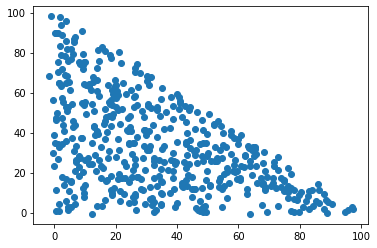

In [3]:
n= 1000
data = np.random.rand(n,2)*100
data = data[data.sum(1)<100]
data = data + np.random.normal(size=data.shape)*1
data = list(enumerate(data))
print(data[:2])
points = np.array([p[1] for p in data])
plt.scatter(*points.T)
plt.show()

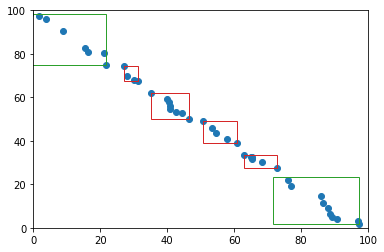

Arret


In [4]:
YN = NDTree(NBMAX=10)
FP = []
for i,p in enumerate(data):
    if YN.update(p):
        points = YN.getPoints()
        carre =  YN.getSquares(True)

m = max(carre, key=lambda x: x[0])[0]
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

for depth,yi, yn in carre:
    yi = np.array(yi)
    yn = np.array(yn)
    plt.gca().add_patch(
        Rectangle(
            yn,*(yi-yn),
            edgecolor=colors[depth],
            facecolor='none',
            lw=1)) 

plt.scatter(*np.array([p[1] for p in points]).T)
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0, ymax=100)
plt.show()
print("Arret")

In [5]:
Xe = np.array([p[1] for p in points])
print(Xe)
for x in Xe:
    s = np.sum(np.all(Xe - x >= 0, axis=1))
    if s>=2:
        print('Problem')
        print(x)
        print(np.where(np.all(Xe - x >= 0, axis=1)))
    else:
        print('OK', s)

[[46.59867547 50.19305953]
 [40.89946551 55.87147869]
 [42.64865468 53.1245311 ]
 [40.92263717 54.71761826]
 [40.03805435 59.31584547]
 [35.20878673 62.11055142]
 [44.27830173 52.99346047]
 [40.63700713 57.66944422]
 [26.95701786 74.35847444]
 [27.97062394 69.90063477]
 [31.3730925  67.5583862 ]
 [30.10851619 68.1847702 ]
 [15.51721417 82.84382748]
 [ 1.74053182 97.60141587]
 [ 3.85215757 95.92609579]
 [21.74408287 74.74104022]
 [ 8.87714084 90.72703145]
 [16.39373617 80.66897958]
 [21.06058094 80.41487758]
 [-1.13158027 98.1863986 ]
 [90.58989344  4.13528714]
 [76.06917866 22.11698716]
 [77.09631809 19.34482837]
 [86.45859584 11.22339001]
 [97.36762521  1.77036543]
 [89.29824174  5.14437783]
 [87.89548127  9.02828849]
 [85.87589123 14.5094866 ]
 [96.98648848  2.9428445 ]
 [88.54586147  6.28182003]
 [64.90989476 32.78793641]
 [68.26099919 30.26487835]
 [65.2978298  32.75292008]
 [65.35379146 31.82082446]
 [72.91714167 27.69853864]
 [63.06910805 33.50205279]
 [50.59423887 49.04623328]
 

## Test PLS

In [ ]:
def PLS(m, params, NBMAX= 20, verbose=False):
	population = init(m,params)
	Xe = NDTree(NBMAX=NBMAX)
	for e in population: Xe.update(e)
	Pa = NDTree(NBMAX=NBMAX)

	iteration = 1
	while population:
		if verbose: print(f'{iteration = } | population size: {len(population)}')
		for p in population:
			for candidat in voisinage(p, params):
				if np.all(p[1] >= candidat[1]): continue
				if Xe.update(candidat): Pa.update(candidat)
		population = Pa.getPoints()
		Pa.reset()
		YND = Xe.getPoints()
		YND = np.array([p[1] for p in YND])
		plt.scatter(*YND.T)
		plt.xlim(xmin = 7e4, xmax=9e4)
		plt.ylim(ymin = 6e4, ymax=8e4)
		plt.show()
		iteration += 1
	return Xe.getPoints()

In [ ]:
## Phase 1
numInstance=1
n= 200
p = 2
w=np.zeros(n,dtype=int) # poids des objets
v=np.zeros((n,p),dtype=int) # utilités des objets
filename = f"./data/2KP{n}-TA-{numInstance}.dat"

print(v.shape)

# W: budget
W=readFile(filename,w,v)

params = (n,p,v,w,W)
m = 1
verbose = True
NBMAX = 20

PLS(
    m,
    params,
    NBMAX,
    verbose= True
)